In [1]:
%matplotlib inline
from context import spew
from scipy.optimize import curve_fit, minimize
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import scipy.ndimage
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import colors as mcolors
from matplotlib.collections import PolyCollection
import pandas as pd
import scipy.stats as stats
plt.style.use('ggplot')
rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)

In [2]:
param = "plume_height"
label = "H"
units = "km"
trial = 10
vals = np.linspace(10000, 40000, 21)

vals = [int(val) for val in vals]

def disp_func(col):
    return col / 1000

eruptions = dict()
samples_df = dict()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


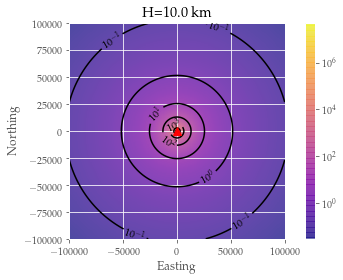

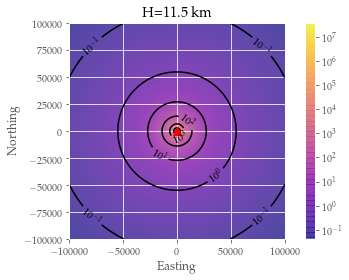

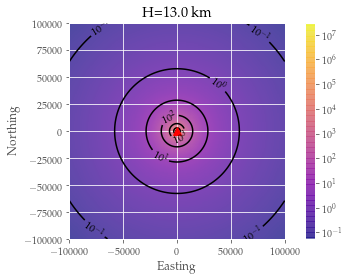

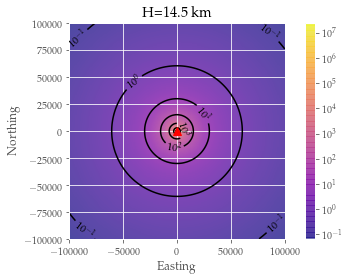

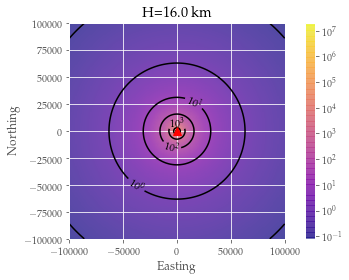

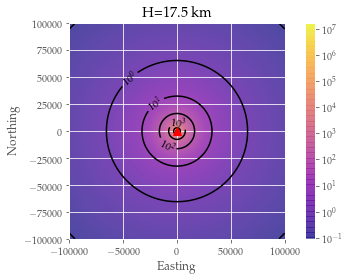

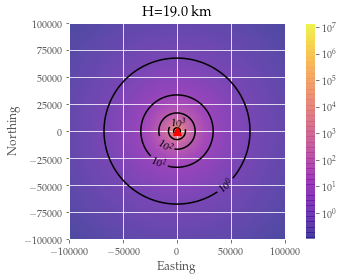

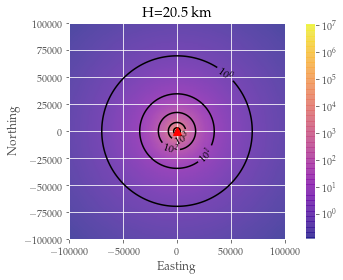

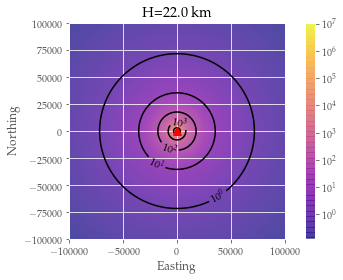

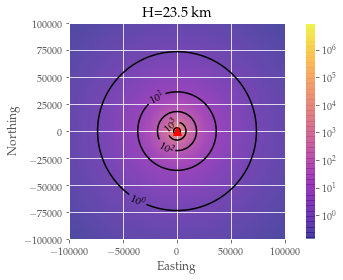

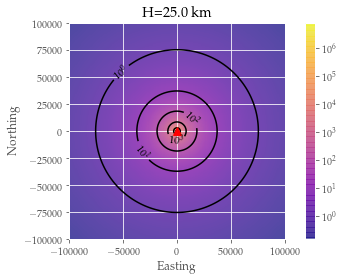

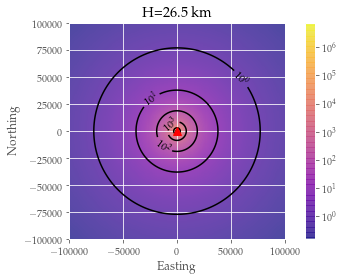

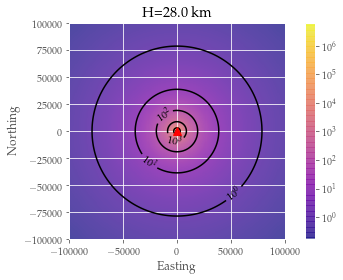

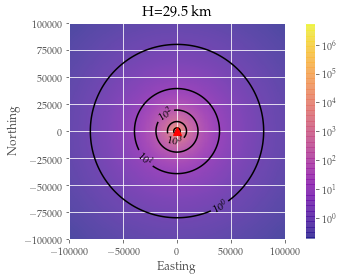

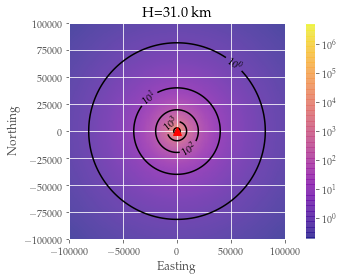

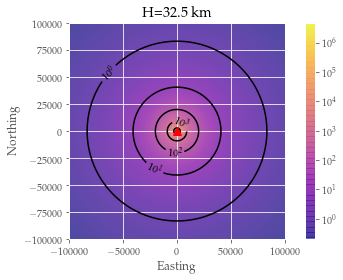

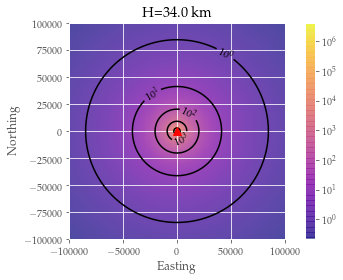

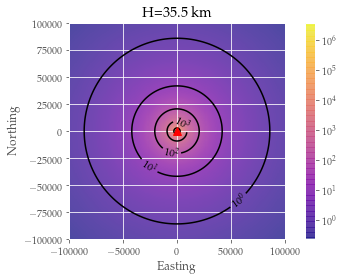

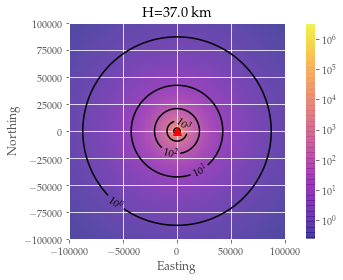

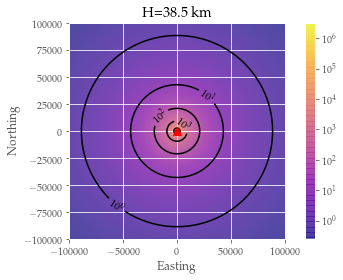

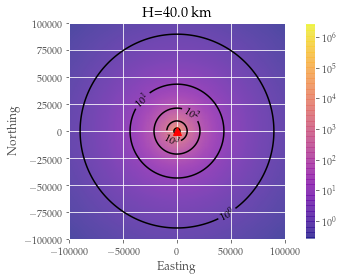

In [3]:
for v in vals:
    filename = '../../data/%s_trial_%d/%s_trial_%d.txt' % (
        param, trial, param, v)
    eruptions[v] = spew.core.eruption.Eruption(data=filename, vent=Point(0, 0), test=False)
    fig, ax = eruptions[v].plot_contour(background='gradient', cmap="plasma", 
                                        line_colors="k", title="H=%s km"%disp_func(v))
#     eruptions[v].df = eruptions[v].sample(50, alpha=0.7)
#     eruptions[v].df.plot(ax=ax, c='c', marker='.', edgecolor="k")
phis = eruptions[vals[0]].phi_labels
rows = int(len(phis) / 2)

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


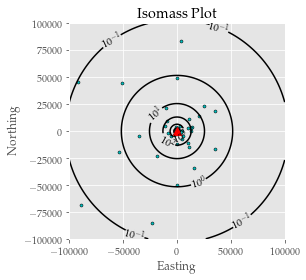

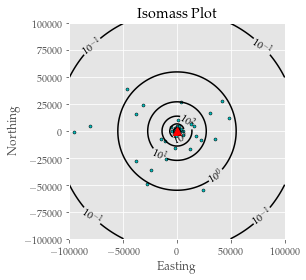

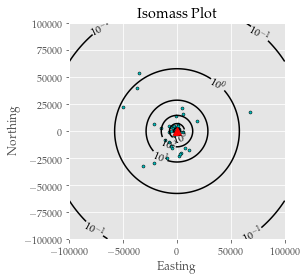

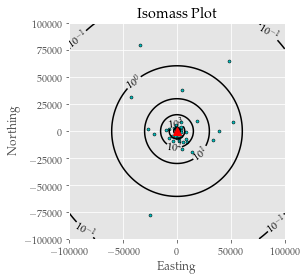

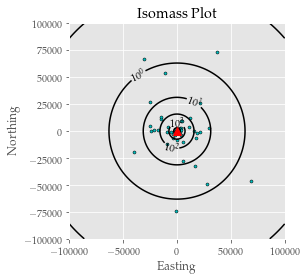

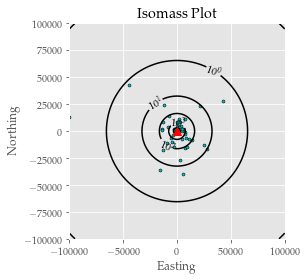

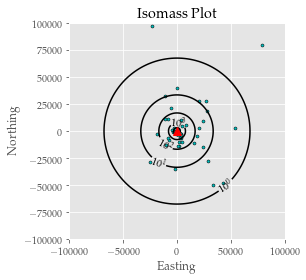

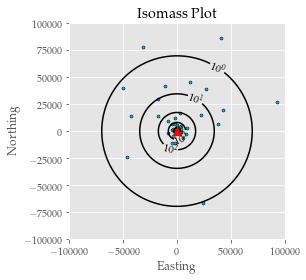

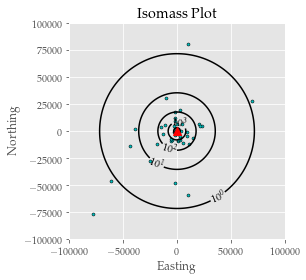

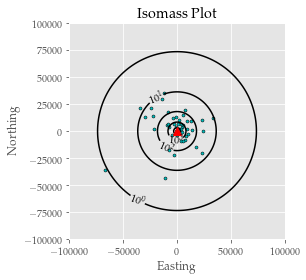

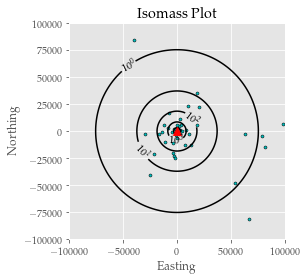

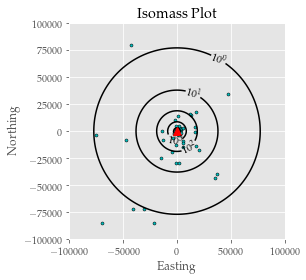

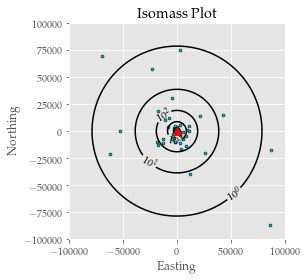

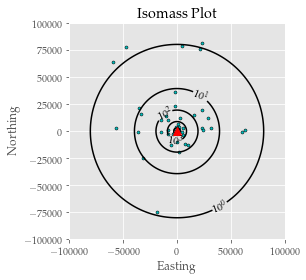

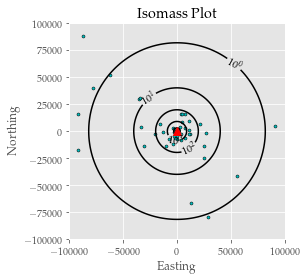

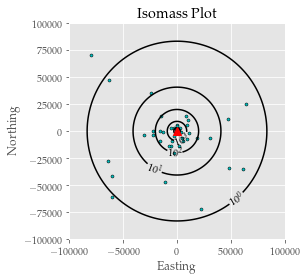

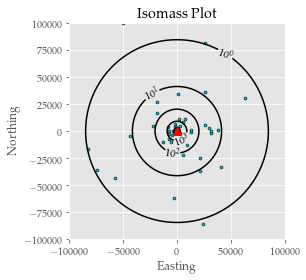

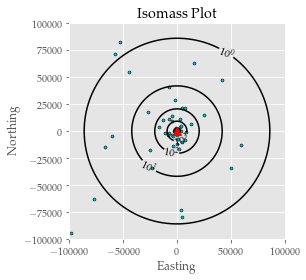

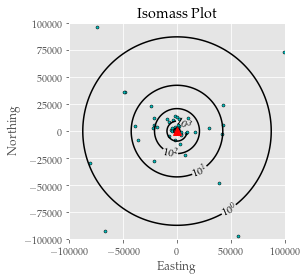

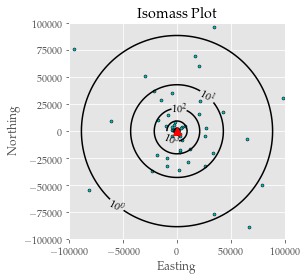

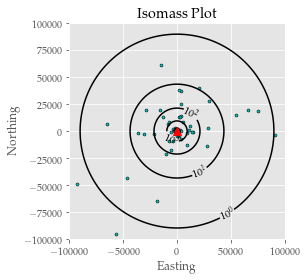

In [4]:
for v in vals:
    samples_df[v] = eruptions[v].sample(50, alpha=0.7)
    fig, ax = eruptions[v].plot_contour(background=None, cmap="plasma", 
                                        line_colors="k")
    samples_df[v].plot(ax=ax, c='c', marker='.', edgecolor="k")
    plt.show()

In [5]:
centroids = eruptions[vals[0]].phi_centroids
display(eruptions[40000].df)

,Easting,Northing,Elevation,MassArea,"[-4.5,-4.07143)","[-4.07143,-3.64286)","[-3.64286,-3.21429)","[-3.21429,-2.78571)","[-2.78571,-2.35714)","[-2.35714,-1.92857)",...,"[1.07143,1.5)","[1.5,1.92857)","[1.92857,2.35714)","[2.35714,2.78571)","[2.78571,3.21429)","[3.21429,3.64286)","[3.64286,4.07143)","[4.07143,4.5)",geometry,radius
0,-100000,-100000,1,0.261309,1.075750e-245,1.384500e-226,7.212320e-207,7.522010e-187,7.605450e-167,1.024130e-146,...,4.788440e-11,0.000014,0.045967,3.75034,24.2661,36.0751,24.5107,11.35170,POINT (-100000 -100000),141421.356237
1,-99000,-100000,1,0.265167,2.940240e-243,2.505160e-224,8.401180e-205,5.569450e-185,3.572920e-165,3.040650e-145,...,6.373930e-11,0.000017,0.049599,3.86294,24.4445,36.0020,24.3714,11.26960,POINT (-99000 -100000),140716.026095
2,-98000,-100000,1,0.269082,7.617680e-241,4.306170e-222,9.330380e-203,3.948830e-183,1.614590e-163,8.724100e-144,...,8.459910e-11,0.000020,0.053476,3.97761,24.6211,35.9274,24.2324,11.18800,POINT (-98000 -100000),140014.284985
3,-97000,-100000,1,0.273055,1.870280e-238,7.030830e-220,9.879550e-201,2.681010e-181,7.018500e-162,2.418880e-142,...,1.119620e-10,0.000023,0.057612,4.09432,24.7959,35.8514,24.0938,11.10690,POINT (-97000 -100000),139316.187143
4,-96000,-100000,1,0.277085,4.350300e-236,1.090260e-217,9.973360e-199,1.743020e-179,2.934720e-160,6.481140e-141,...,1.477460e-10,0.000027,0.062018,4.21307,24.9689,35.7740,23.9557,11.02640,POINT (-96000 -100000),138621.787609
5,-95000,-100000,1,0.281174,9.583950e-234,1.605540e-215,9.598450e-197,1.085110e-177,1.180400e-158,1.678140e-139,...,1.944060e-10,0.000032,0.066709,4.33383,25.1401,35.6952,23.8179,10.94630,POINT (-95000 -100000),137931.142241
6,-94000,-100000,1,0.285321,1.999290e-231,2.245090e-213,8.806560e-195,6.468700e-176,4.567040e-157,4.199040e-138,...,2.550640e-10,0.000037,0.071698,4.45658,25.3093,35.6151,23.6805,10.86670,POINT (-94000 -100000),137244.307714
7,-93000,-100000,1,0.289528,3.948370e-229,2.980840e-211,7.702800e-193,3.692550e-174,1.699740e-155,1.015350e-136,...,3.336820e-10,0.000042,0.077000,4.58129,25.4766,35.5337,23.5437,10.78770,POINT (-93000 -100000),136561.341528
8,-92000,-100000,1,0.293793,7.380320e-227,3.757520e-209,6.422740e-191,2.018370e-172,6.085150e-154,2.372590e-135,...,4.352720e-10,0.000049,0.082629,4.70794,25.6419,35.4510,23.4072,10.70920,POINT (-92000 -100000),135882.302012
9,-91000,-100000,1,0.298118,1.305470e-224,4.496720e-207,5.105220e-189,1.056430e-170,2.095580e-152,5.357680e-134,...,5.661540e-10,0.000057,0.088599,4.83650,25.8052,35.3671,23.2713,10.63130,POINT (-91000 -100000),135207.248326


In [7]:
def coef_def(y, y_fit):
    # residual sum of squares
    ss_res = np.sum((y - y_fit) ** 2)

    # total sum of squares
    ss_tot = np.sum((y - np.mean(y)) ** 2)

    # r-squared
    r2 = 1 - (ss_res / ss_tot)

    return r2

c:\users\nmostert\envs\spew\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
c:\users\nmostert\envs\spew\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
c:\users\nmostert\envs\spew\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
c:\users\nmostert\envs\spew\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


_______Phi:[-4.5,-4.07143) __ H:10000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.e+00 -1.e-03  1.e+02]
w_gk_res:-205.12307375599096
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[ 0.01235756 -0.00256389  0.12957382]
uw_gk_res:-2.502861671493939e-05


c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


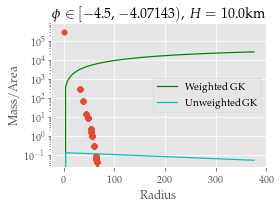

_______Phi:[-4.5,-4.07143) __ H:11500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.e+00 -1.e-03  1.e+02]
w_gk_res:-352.85505121560436
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[ 0.01235376 -0.00256351  0.17396469]
uw_gk_res:-2.523816061650308e-05


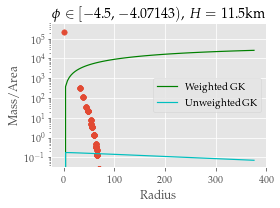

KeyboardInterrupt: 

In [13]:
def log_gamma_kernel(x, a, b, c):
    return np.log(c) + (a*np.log(x)) + (b * x)

def gamma_kernel(x, a, b, c):
    return c*(x**a)*np.exp(b*x)


def w_lgk_sse(k, x_data, y_data):
    return sum(((1e9/(x_data**2))*(np.log(y_data) - (log_gamma_kernel(x_data, *k))) ** 2))

def w_gk_sse(k, x_data, y_data):
    return sum(((1e9/(x_data**2))*(y_data - (gamma_kernel(x_data, *k))) ** 2))

def uw_lgk_sse(k, x_data, y_data):
    return sum((np.log(y_data) - (log_gamma_kernel(x_data, *k))) ** 2)

def uw_gk_sse(k, x_data, y_data):
    return sum((y_data - (gamma_kernel(x_data, *k))) ** 2)


plot = True
save = False

w_gk_df = pd.DataFrame(columns=['H', 'Phi', 'a', 'b', 'c', 'res', 'data'])
uw_gk_df = pd.DataFrame(columns=['H', 'Phi', 'a', 'b', 'c', 'res', 'data'])

for k, phi in enumerate(phis):
#     fig, axs = plt.subplots(rows, 2, figsize=(
#         20, 15), facecolor='w', edgecolor='k')
#     axs = axs.ravel()
    for i, (h, erp) in enumerate(eruptions.items()):
        new_df = erp.df
        ma = new_df['MassArea'].values
        wt = new_df[phi].values
        xx = new_df['radius'].values
        yy = ma * (wt / 100)

        pnts = list(set(zip(xx, yy)))
        pnts = sorted(pnts, key=lambda x: x[0])

        x_data = xx
        y_data = yy

        k0 = np.array([1, -1e-3, 100], dtype=np.float64)

        def w_gk_fun(k): return w_gk_sse(k, x_data, y_data)
        
        def uw_gk_fun(k): return uw_gk_sse(k, x_data, y_data)

        w_gk_popt = minimize(w_gk_fun, k0, method='Nelder-Mead')
        uw_gk_popt = minimize(uw_gk_fun, k0, method='Nelder-Mead')
        
        w_gk_res = coef_def(y_data, gamma_kernel(x_data, *w_gk_popt.x))
        uw_gk_res = coef_def(y_data, gamma_kernel(x_data, *uw_gk_popt.x))
        print("_______Phi:" + str(phi) + " __ H:" + str(h) + "______")
        print("Weighted Gamma Kernel: " + str(w_gk_popt.success) + " : " + str(w_gk_popt.message))
        print("w_gk_params:" + str(w_gk_popt.x))
        print("w_gk_res:" + str(w_gk_res))
        print("Unweighted Gamma Kernel: " + str(uw_gk_popt.success) + " : " + str(uw_gk_popt.message))
        print("uw_gk_params:" + str(uw_gk_popt.x))
        print("uw_gk_res:" + str(uw_gk_res))

        xf = np.linspace(0, x_data.max(), 100)
        w_gk_yf = gamma_kernel(xf, *w_gk_popt.x)
        uw_gk_yf = gamma_kernel(xf, *uw_gk_popt.x)

        w_gk_df = w_gk_df.append(
            {'H': h, 'Phi': phi, 'a': w_gk_popt.x[0], 'b': w_gk_popt.x[1], 'c': w_gk_popt.x[2], 'res': w_gk_res, 'data': (x_data, y_data)}, ignore_index=True)
        uw_gk_df = uw_gk_df.append(
            {'H': h, 'Phi': phi, 'a': uw_gk_popt.x[0], 'b': uw_gk_popt.x[1], 'c': uw_gk_popt.x[2],'res': uw_gk_res, 'data': (x_data, y_data)}, ignore_index=True)

        if plot:
            fig, ax1 = plt.subplots(1, 1, figsize=(4, 3))
            ax1.semilogy(xf, w_gk_yf, 'g-', lw=1.2, label="Weighted GK")
            ax1.semilogy(xf, uw_gk_yf, 'c-', lw=1.2, label="Unweighted GK")
            ax1.scatter(x_data, y_data, s=30)
    #         ax2.scatter(np.log(x_data), np.log(y_data), s=30)
    #         ax2.plot(np.log(xf), w_lgk_yf, 'b-', lw=1.2, label="w lgk")
    #         ax2.plot(np.log(xf), np.log(w_gk_yf), 'g-', lw=1.2, label="w gk")
    #         ax2.plot(np.log(xf), uw_lgk_yf, 'm-', lw=1.2, label="uw lgk")
    #         ax2.plot(np.log(xf), np.log(uw_gk_yf), 'c-', lw=1.2, label="uw gk")
            plt.legend()
            ax1.set_ylabel('Mass/Area')
            ax1.set_xlabel(r'Radius')
            plt.title(r'$\phi \in %s,\:H=%s$km' % (str(phi), disp_func(h)), fontsize=14)
            plt.tight_layout()

        if save:
            plt.savefig("../../data/%s_trial_%d/phi%s_H%skm.png" %
            (param, trial, phi, disp_func(h)), dpi=200, format='png')
        else:
            plt.show()
display(w_gk_df)
display(uw_gk_df)

Weighted Gamma Kernel


c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


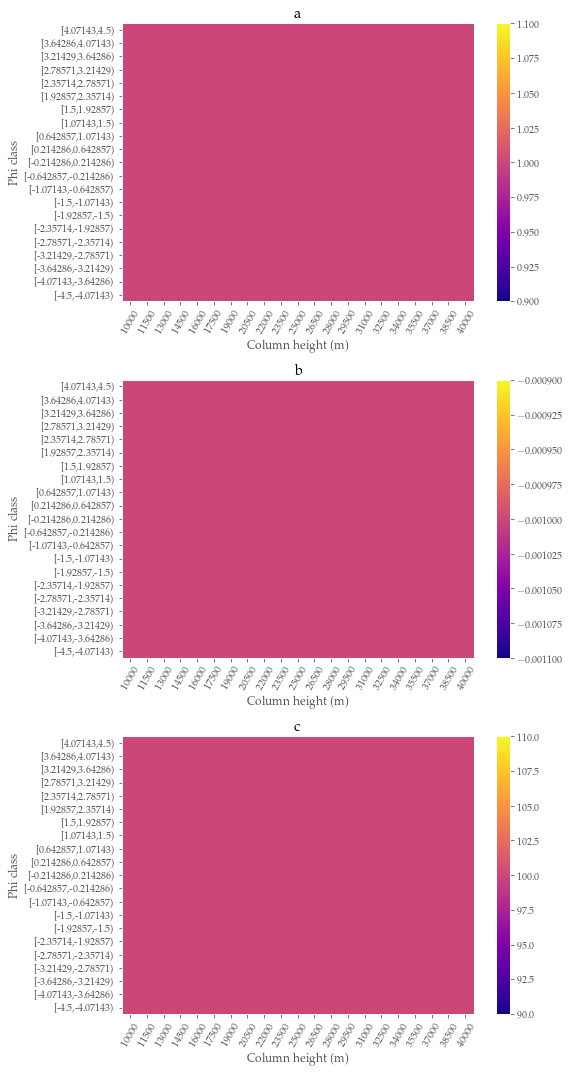

Unweighted Gamma Kernel


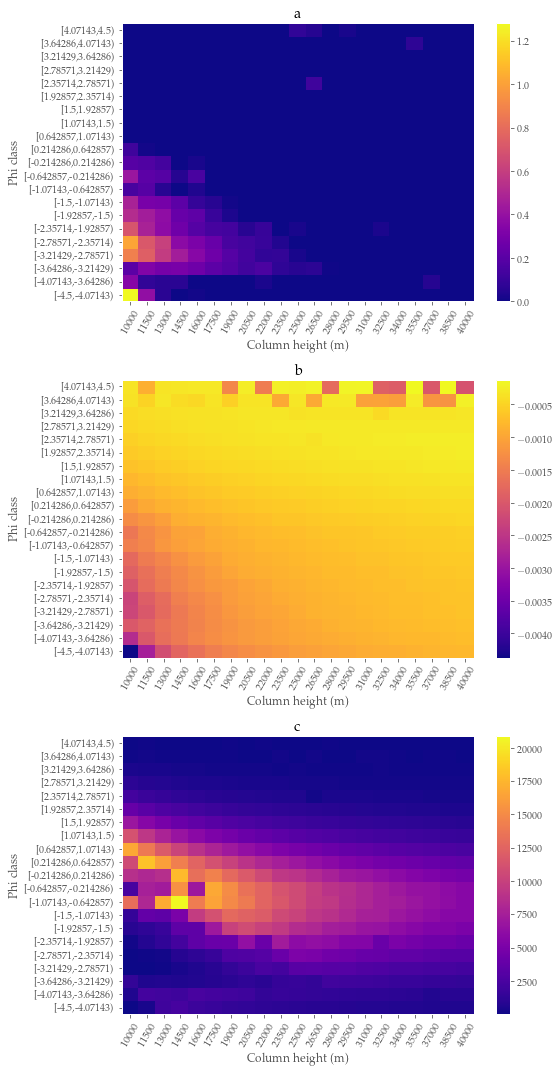

In [9]:
for df, tit in zip([w_gk_df, uw_gk_df], ["Weighted Gamma Kernel", "Unweighted Gamma Kernel"]):
    a_piv = df.pivot_table(index='Phi', columns='H', values='a')
    b_piv = df.pivot_table(index='Phi', columns='H', values='b')
    c_piv = df.pivot_table(index='Phi', columns='H', values='c')
    a_piv = a_piv.reindex(phis)
    b_piv = b_piv.reindex(phis)
    c_piv = c_piv.reindex(phis)

    print(tit)
    fig, axs = plt.subplots(3, 1, figsize=(
        8, 15), facecolor='w', edgecolor='k')
    axs = axs.ravel()
    for i, piv, p in zip([0, 1, 2], [a_piv, b_piv, c_piv], ['a', 'b', 'c']):
        c = axs[i].pcolor(piv.values, cmap='plasma')
        # cont = axs[i].contour(scipy.ndimage.zoom(piv.values, 3), colors='w')
        axs[i].set_yticks(np.arange(0.5, len(piv.index), 1))
        axs[i].set_yticklabels(piv.index)
        axs[i].set_xticks(np.arange(0.5, len(piv.columns), 1))
        axs[i].set_xticklabels(piv.columns, rotation=60)
        fig.colorbar(c, ax=axs[i])
        axs[i].grid(False)
        axs[i].set_title(p)
        # axs[i].clabel(cont, inline=1, fontsize=10)
        axs[i].set_xlabel("Column height (m)")
        axs[i].set_ylabel("Phi class")
    # plt.locator_params(nbins=7)
    plt.tight_layout()
    plt.savefig("param_maps_cont_weights%s.png" % tit, format='png')
    plt.show()

Weighted Gamma Kernel
Unweighted Gamma Kernel


c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


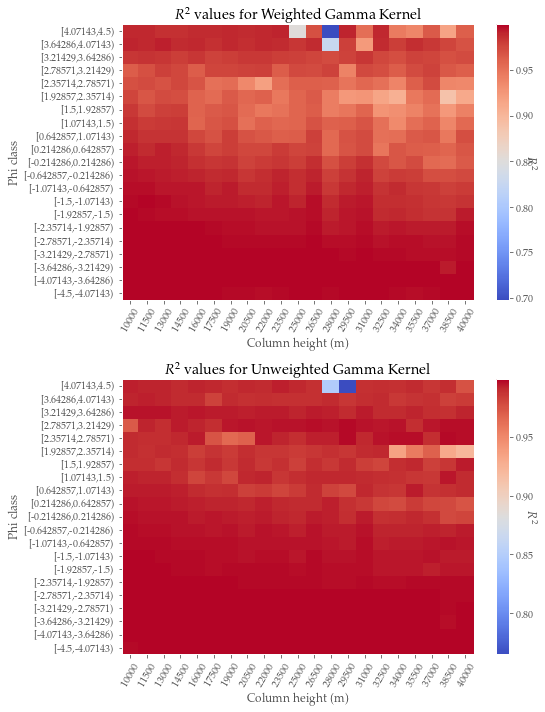

In [19]:

fig, axs = plt.subplots(2, 1, figsize=(
    8, 10), facecolor='w', edgecolor='k')
axs = axs.ravel()
for df, tit, i in zip([w_gk_df, uw_gk_df], ["Weighted Gamma Kernel", "Unweighted Gamma Kernel"], [0,1]):
    print(tit)
    c = axs[i].pcolor(df["res"].values.reshape(21,21), cmap='coolwarm')
    # cont = axs[i].contour(scipy.ndimage.zoom(piv.values, 3), colors='w')
    axs[i].set_yticks(np.arange(0.5, len(piv.index), 1))
    axs[i].set_yticklabels(piv.index)
    axs[i].set_xticks(np.arange(0.5, len(piv.columns), 1))
    axs[i].set_xticklabels(piv.columns, rotation=60)
    cbar = fig.colorbar(c, ax=axs[i])
    cbar.ax.set_ylabel("$R^2$", rotation=270)
    axs[i].grid(False)
    axs[i].set_title("$R^2$ values for %s"%tit)
    axs[i].set_xlabel("Column height (m)")
    axs[i].set_ylabel("Phi class")
    # plt.locator_params(nbins=7)
plt.tight_layout()
plt.savefig("param_maps_cont_res.png", format='png')
plt.show()

In [ ]:
def log_gamma_kernel(x, a, b, c):
    return np.log(c) + (a*np.log(x)) + (b * x)

def gamma_kernel(x, a, b, c):
    return c*(x**a)*np.exp(b*x)


def w_lgk_sse(k, x_data, y_data):
    return sum(((1e9/(x_data**2))*(np.log(y_data) - (log_gamma_kernel(x_data, *k))) ** 2))

def w_gk_sse(k, x_data, y_data):
    return sum(((1e9/(x_data**2))*(y_data - (gamma_kernel(x_data, *k))) ** 2))

def uw_lgk_sse(k, x_data, y_data):
    return sum((np.log(y_data) - (log_gamma_kernel(x_data, *k))) ** 2)

def uw_gk_sse(k, x_data, y_data):
    return sum((y_data - (gamma_kernel(x_data, *k))) ** 2)


w_gk_df = pd.DataFrame(columns=['H', 'Phi', 'a', 'b', 'c', 'res', 'data'])
w_lgk_df = pd.DataFrame(columns=['H', 'Phi', 'a', 'b', 'c', 'res', 'data'])
uw_gk_df = pd.DataFrame(columns=['H', 'Phi', 'a', 'b', 'c', 'res', 'data'])
uw_lgk_df = pd.DataFrame(columns=['H', 'Phi', 'a', 'b', 'c', 'res', 'data'])




for k, phi in enumerate(phis):
#     fig, axs = plt.subplots(rows, 2, figsize=(
#         20, 15), facecolor='w', edgecolor='k')
#     axs = axs.ravel()
    for i, (h, erp) in enumerate(eruptions.items()):
        new_df = erp.df
        ma = new_df['MassArea'].values
        wt = new_df[phi].values
        xx = new_df['radius'].values**2
        yy = ma * (wt / 100)

        pnts = list(set(zip(xx, yy)))
        pnts = sorted(pnts, key=lambda x: x[0])

        x = np.array([p[0] for p in pnts], dtype=np.float64)
        y = np.array([p[1] for p in pnts], dtype=np.float64)

        tot_mass = np.trapz(y, x=x)
        idx = 0
        perc = 0.0
        while perc < 99.999:
            mass = np.trapz(y[:idx], x=x[:idx])
            idx += 1
            perc = (mass / tot_mass) * 100

        x_data = x[:idx]
        y_data = y[:idx]
#         x_data = x
#         y_data = y

        k0 = np.array([1, -1e-3, 1], dtype=np.float64)

        def w_gk_fun(k): return w_gk_sse(k, x_data, y_data)
        
        def w_lgk_fun(k): return w_lgk_sse(k, x_data, y_data)
        
        def uw_gk_fun(k): return uw_gk_sse(k, x_data, y_data)
        
#         def uw_lgk_fun(k): return uw_lgk_sse(k, x_data, y_data)
        
        w_gk_bounds = [(None, None),(None, -1e-7), (None, None)]
        w_lgk_bounds = [(None, None),(None, -1e-7), (None, None)]
        uw_gk_bounds = [(None, None),(None, -1e-7), (None, None)]
#         uw_lgk_bounds = [(None, None),(None, -1e-7), (None, None)]
        
        w_gk_popt = minimize(w_gk_fun, k0, bounds=w_gk_bounds, method='Nelder-Mead')
        w_lgk_popt = minimize(w_lgk_fun, k0, bounds=w_lgk_bounds, method='Nelder-Mead')
        uw_gk_popt = minimize(uw_gk_fun, k0, bounds=uw_gk_bounds, method='Nelder-Mead')
        
        w_gk_res = coef_def(y_data, gamma_kernel(x_data, *w_gk_popt.x))
        w_lgk_res = coef_def(y_data, log_gamma_kernel(x_data, *w_lgk_popt.x))
        uw_gk_res = coef_def(y_data, gamma_kernel(x_data, *uw_gk_popt.x))
        
#         uw_lgk_popt = minimize(uw_lgk_fun, k0, bounds=uw_lgk_bounds, method='Nelder-Mead')
        print("_______Phi:" + str(phi) + " __ H:" + str(h) + "______")
        print("Weighted Gamma Kernel: " + str(w_gk_popt.success) + " : " + str(w_gk_popt.message))
        print("w_gk_params:" + str(w_gk_popt.x))
        print("w_gk_res:" + str(w_gk_res))
        print("Weighted Log Gamma Kernel: " + str(w_lgk_popt.success) + " : " + str(w_lgk_popt.message))
        print("w_lgk_params:" + str(w_lgk_popt.x))
        print("w_lgk_res:" + str(w_lgk_res))
        print("Unweighted Gamma Kernel: " + str(uw_gk_popt.success) + " : " + str(uw_gk_popt.message))
        print("uw_gk_params:" + str(uw_gk_popt.x))
        print("uw_gk_res:" + str(uw_gk_res))
#         print("Unweighted Log Gamma Kernel: " + str(uw_lgk_popt.success) + " : " + str(uw_lgk_popt.message))
#         print("uw_lgk_params:" + str(uw_lgk_popt.x))
        
        xf = np.linspace(0, x_data.max(), 100)
        w_gk_yf = gamma_kernel(xf, *w_gk_popt.x)
        w_lgk_yf = log_gamma_kernel(xf, *w_lgk_popt.x)
        uw_gk_yf = gamma_kernel(xf, *uw_gk_popt.x)
#         uw_lgk_yf = log_gamma_kernel(xf, *uw_lgk_popt.x)

#         if (phi in phis[-2:] and h in vals[::2]):
        fig, ax1 = plt.subplots(1, 1, figsize=(4, 3))

        ax1.scatter(x_data, y_data, s=30)
        ax1.plot(xf, np.exp(w_lgk_yf), 'b-', lw=1.2, label="Weighted LGK")
        ax1.plot(xf, w_gk_yf, 'g-', lw=1.2, label="Weighted GK")
#         ax1.plot(xf, np.exp(uw_lgk_yf), 'm-', lw=1.2, label="Unweighted LGK")
        ax1.plot(xf, uw_gk_yf, 'c-', lw=1.2, label="Unweighted GK")
#         ax2.scatter(np.log(x_data), np.log(y_data), s=30)
#         ax2.plot(np.log(xf), w_lgk_yf, 'b-', lw=1.2, label="w lgk")
#         ax2.plot(np.log(xf), np.log(w_gk_yf), 'g-', lw=1.2, label="w gk")
#         ax2.plot(np.log(xf), uw_lgk_yf, 'm-', lw=1.2, label="uw lgk")
#         ax2.plot(np.log(xf), np.log(uw_gk_yf), 'c-', lw=1.2, label="uw gk")
        plt.legend()
        ax1.set_ylabel('Mass/Area')
        ax1.set_xlabel(r'Radius')
        plt.title(r'$\phi \in %s,\:H=%s$km' % (str(phi), disp_func(h)), fontsize=14)
        w_gk_df = w_gk_df.append(
            {'H': h, 'Phi': phi, 'a': w_gk_popt.x[0], 'b': w_gk_popt.x[1], 'c': w_gk_popt.x[2], 'res': w_gk_res, 'data': (x_data, y_data)}, ignore_index=True)
        w_lgk_df = w_lgk_df.append(
            {'H': h, 'Phi': phi, 'a': w_lgk_popt.x[0], 'b': w_lgk_popt.x[1], 'c': w_lgk_popt.x[2], 'res': w_lgk_res, 'data': (x_data, y_data)}, ignore_index=True)
        uw_gk_df = uw_gk_df.append(
            {'H': h, 'Phi': phi, 'a': uw_gk_popt.x[0], 'b': uw_gk_popt.x[1], 'c': uw_gk_popt.x[2], 'res': uw_gk_res, 'data': (x_data, y_data)}, ignore_index=True)
#         uw_lgk_df = uw_lgk_df.append(
#             {'H': h, 'Phi': phi, 'a': uw_lgk_popt.x[0], 'b': uw_lgk_popt.x[1], 'c': uw_lgk_popt.x[2], 'data': (x_data, y_data)}, ignore_index=True)
        plt.tight_layout()
#         plt.savefig("../data/%s_trial_%d/phi%s_H%skm.png" %
#                 (param, trial, phi, disp_func(h)), dpi=200, format='png')
        plt.show()
display(w_gk_df)
display(w_lgk_df)
display(uw_gk_df)
# display(uw_lgk_df)